# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 3

In [136]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

## Задача 1


Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \sigma^2)$. Известно, что в качестве оценки параметра $\sigma^2$ можно использовать следующие оценки $S^2, \frac{n}{n-1}S^2$. Проверьте эти оценки на несмещенность повторив эксперимент с семинара.

Реализуйте две функции, каждая из которых на вход берет несколько выборок, а на выход выдает массив оценок  
(первая функция - $S^2$, вторая функция - $\frac{n}{n-1}S^2$)  для каждой выборки.  
*Примечание:* У матрицы, заданной в виде `numpy.array` есть метод `var` вычисляющий выборочную дисперсию. 

In [137]:
def estimate_s2(X):
    '''     
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    '''
    return X.var(axis=1)

def estimate_s2_corrected(X):
    '''     
    Принимает на вход массив размером (n_samples, sample_size), выдает массив оценок размера (n_samples,)
    '''
    return X.shape[1] / (X.shape[1] - 1) * X.var(axis=1)

Проверьте правильность своей реализации

In [138]:
X = np.array([[1, 3, 3, 6], [2, 5, 1, 89]])
estimate_s2(X)

assert(sum(estimate_s2(X) != np.array([3.1875, 1399.6875])) == 0)
assert(sum(estimate_s2_corrected(X) != np.array((4.25, 1866.25))) == 0)


Задайте список оценок и разные параметры для отрисовки графика

In [139]:
estimators = [
    (estimate_s2, r'$S^2$', 'purple', 0),
    (estimate_s2_corrected, r'$\frac{n}{n-1}$$S^2$', 'green', 0.1)
]

Создайте 500 выборок размера `sample_size`.

In [140]:
sample_count = 500
sample_size = 100
X = sps.norm.rvs(size=(sample_count, sample_size))
X.shape

(500, 100)

Визуализируйте полученные оценки на одном графике. Средние значения по 500 экспериментам для каждой оценки нужно обозначить звездочками.



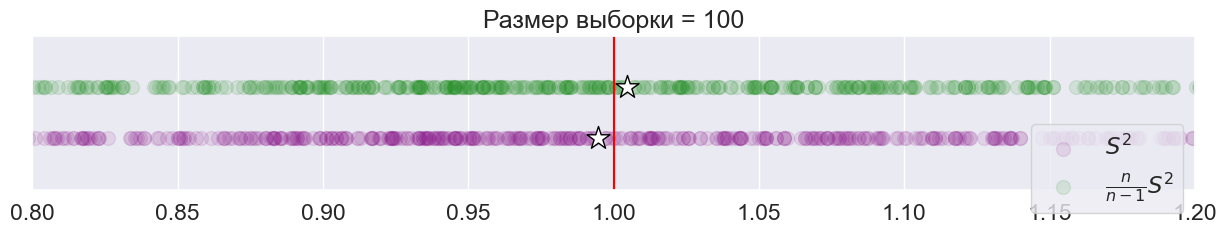

In [141]:
plt.figure(figsize=(15, len(estimators)))
for estimator, name, color, y in estimators:
    E = estimator(X)
    plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                    s=100, color=color, label=name)
    plt.scatter(E.mean(), y, marker='*', s=300,
                    color='w', edgecolors='black')

    plt.vlines(1, -1, 1, color='r')
    plt.title('Размер выборки = %d' % sample_size)
    plt.yticks([])
    plt.legend(bbox_to_anchor=(1, 0.5))
    plt.xlim((0.8, 1.2))
    plt.ylim((-0.1, 0.1 * len(estimators)))

Напишите функцию построения таких графиков в общем виде: на вход функция может получать любые распределения (`distributions`) и любые оценки (`estimators`).




In [142]:
def est_plot(distribution, estimators, sample_size, sample_count):  
    '''
    Построение графика разброса реализаций оценок и их средних значений.
    
    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    sample_size -- размер выборок
    sample_count -- количество генерируемых выборок
    '''    
    X = distribution.rvs(size=(sample_count, sample_size))

    plt.figure(figsize=(15, 0.7*len(estimators)))
    for estimator, name, color, y in estimators:
        E = estimator(X)
        plt.scatter(E, np.zeros(sample_count) + y, alpha=0.1,
                        s=100, color=color, label=name)
        plt.scatter(E.mean(), y, marker='*', s=300,
                        color='w', edgecolors='black')

        plt.vlines(1, -1, 1, color='r')
        plt.title('Размер выборки = %d' % sample_size)
        plt.yticks([])
        plt.legend(bbox_to_anchor=(1.05, 0.6))
        plt.xlim((0.8, 1.2))
        plt.ylim((-0.1, 0.1 * len(estimators)))

Постройте три графика, аналогичных верхнему, для разных размеров выборок (10, 100, 500).


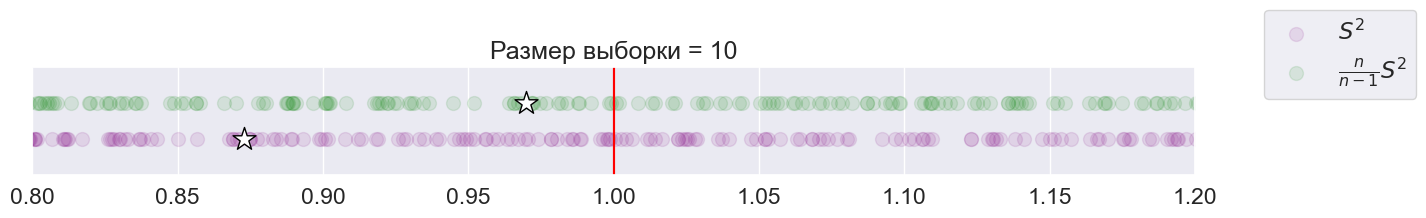

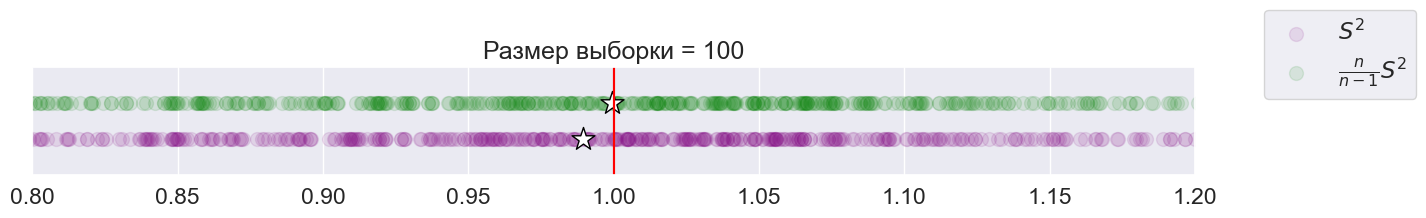

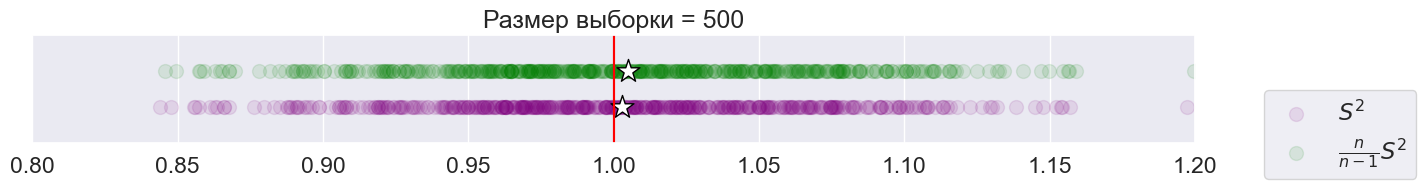

In [143]:
sample_size_list = (10, 100, 500)  # размеры выборок
sample_count = 500  # количество экспериментов

for sample_size in sample_size_list:
    est_plot(sps.norm, estimators, sample_size, sample_count)

Изучите поведение среднего оценок из первого пункта при росте размера $n$ выборки - постройте график зависимости среднего оценки по всем экспериментам от размера выборки. Для вычисления зависимости нужно один раз сгенерировать выборки из достаточно большого размера и посчитать оценки по префиксам, используя функции из `numpy`.




In [144]:
def mean_plot(distribution, estimators, n_grid, sample_count):
  '''
    distribution -- распределение формата scipy.stats
    estimators -- список оценок и параметров для отрисовки графиков
    n_grid -- массив значений размера выборки
    sample_count -- количество генерируемых выборок
  '''
  plt.figure(figsize=(15, 6))

  estimations = np.zeros((len(estimators), len(n_grid)))
  X = distribution.rvs(size=(sample_count, int(n_grid[-1])))
  for e_ind, estimator in enumerate(estimators):
    for s_ind, size in enumerate(n_grid):
      estimations[e_ind][s_ind] = np.mean(estimator[0](X[:, :int(size)]))
    
    plt.plot(n_grid, estimations[e_ind], label=estimator[1])
  
  plt.title('Зависимость среднего оценки по всем экспериментам от размера выборки')
  plt.xlabel('Размер выборки $n$')

  plt.legend()

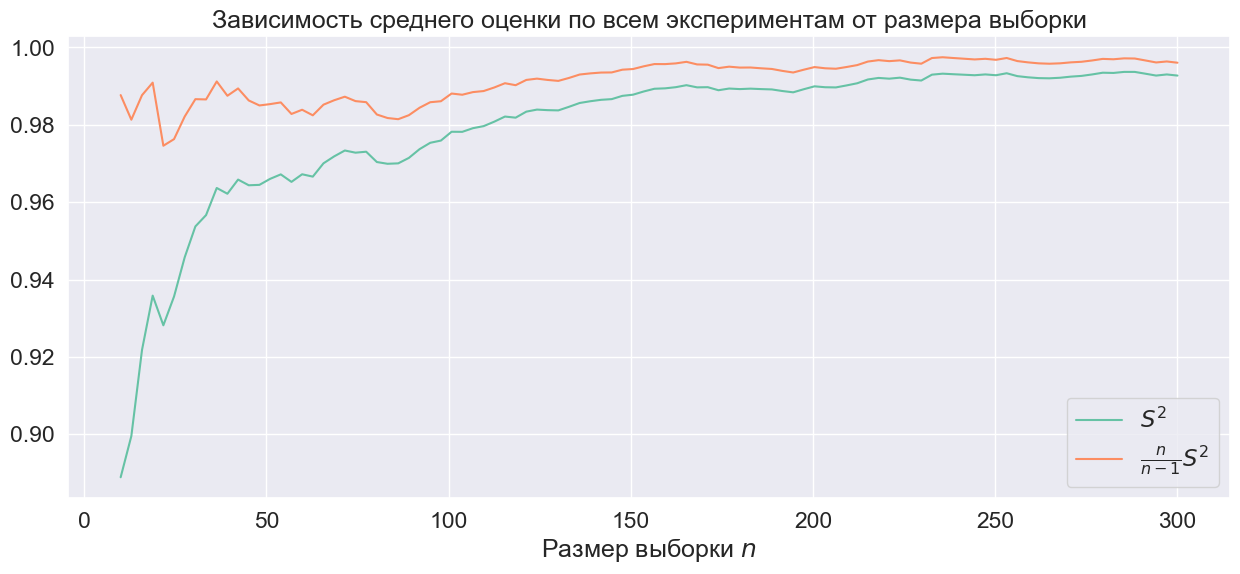

In [156]:
n_grid = np.linspace(10, 300, 100)
mean_plot(sps.norm, estimators, n_grid, sample_count)

 Какие из оценок являются асимптотически несмещёнными (т.е. $\forall \theta \in \Theta\colon \mathsf{E}_\theta \widehat{\theta} \to \theta$ при $n\to +\infty$)?

#### **Ответ:** Обе

## Задача 2.

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $Exp(\theta)$. Как известно из теории, оценка $\widehat{\theta} = 1/\overline{X}$ является *состоятельной* и *асимтотически нормальной* оценкой параметра $\theta$ с асимптотической дисперсией $\theta^2$. В этой задаче вам необходимо визуализировать данные свойства.



Зададим параметры эксперимента

In [146]:
theta = 2  # истинное значение параметра
sample_size = 300  # размер выборок
sample_count = 500  # количество выборок
n_range = (np.arange(sample_size) + 1)  # размеры подвыборок


Сгенерируем множество выборок (количество выборок - `sample_count`, размер каждой выборки - `sample_size`)

In [147]:
# генерируем множество выборок, 
# параметр theta является обратным к параметру масштаба
samples = sps.expon(scale=1/theta).rvs(size=(sample_count, sample_size))


Вычислим оценки в зависимости от размера выборки, усредняем по последней оси

In [148]:
estimation = n_range / samples.cumsum(axis=1)

Визуализируем для каждой выборки все оценки в зависимости от размера выборки.

Что можно сказать о состоятельности данной оценки?

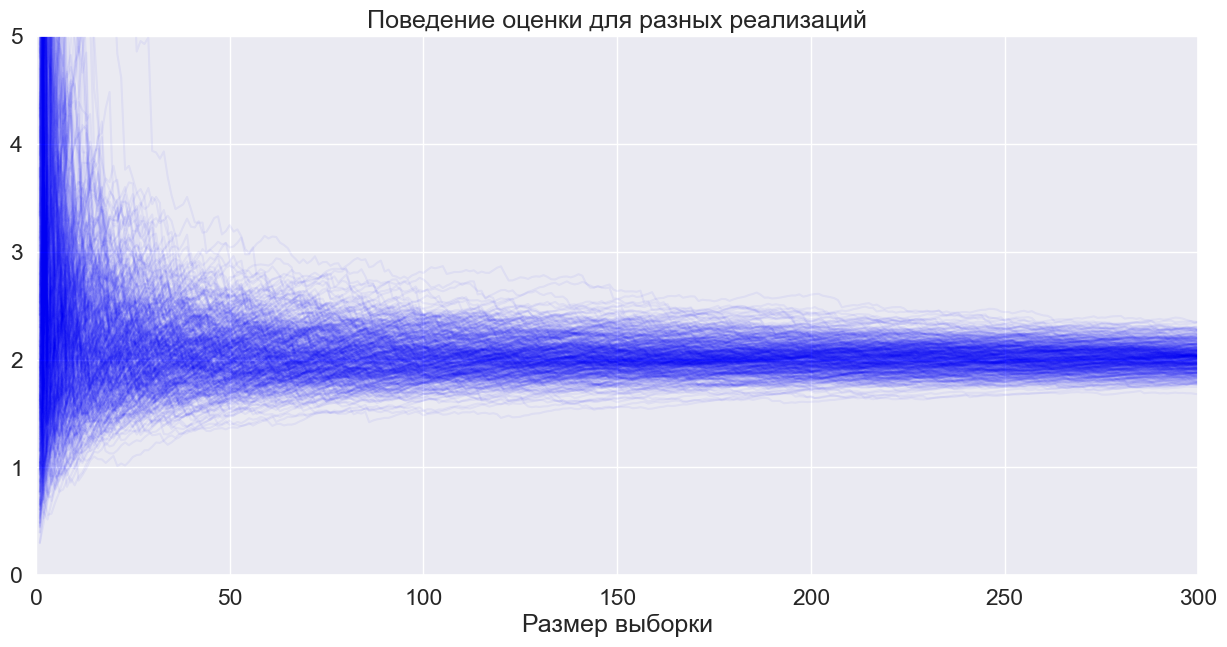

In [149]:
plt.figure(figsize=(15, 7))
for i in range(sample_count):
    plt.plot(np.arange(sample_size) + 1, estimation[i], color='blue', alpha=0.05)
plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.ylim((0, 5))
plt.xlim((0, sample_size));

#### **Ответ:** сильная состоятельность

Добавим доверительный интервал для нашей оценки.

Свойство *асимптотической нормальности* говорит о том, что с вероятностью около 0.95 при больших размерах выборки значение оценки отклоняется от истинного значения параметра не более чем на $2\theta\left/\sqrt{n}\right.$. Допишите код, чтобы на рисунок добавился доверительный интервал.

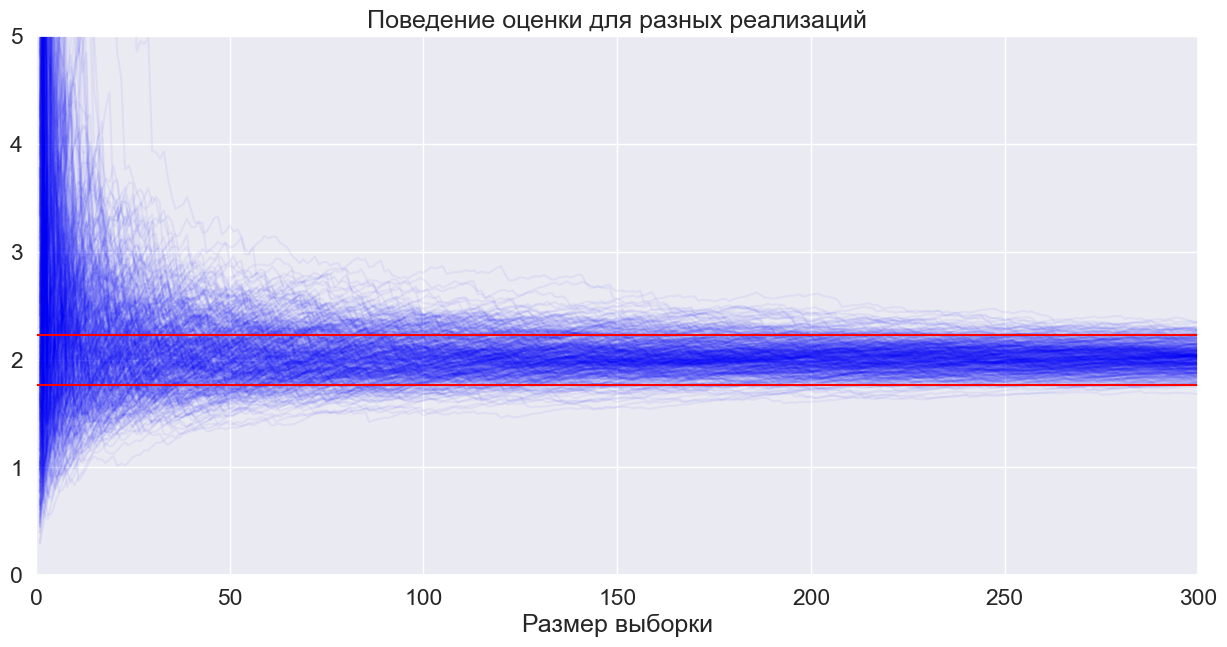

In [150]:
plt.figure(figsize=(15, 7))
for i in range(sample_count):
    plt.plot(np.arange(sample_size) + 1, estimation[i], color='blue', alpha=0.05)

plt.axhline(y = theta + 2 * theta / np.sqrt(sample_size), color = 'r', linestyle = '-')
plt.axhline(y = theta - 2 * theta / np.sqrt(sample_size), color = 'r', linestyle = '-')
plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.ylim((0, 5))
plt.xlim((0, sample_size));

**Вывод:** Большая часть реализаций при больших n лежит внутри доверительного интервала. Следовательно утверждение о том что оценка является ассимптотически нормальной верно.

Приблизим этот график в области малых размеров выборки (до 50). Какой вывод вы можете сделать?

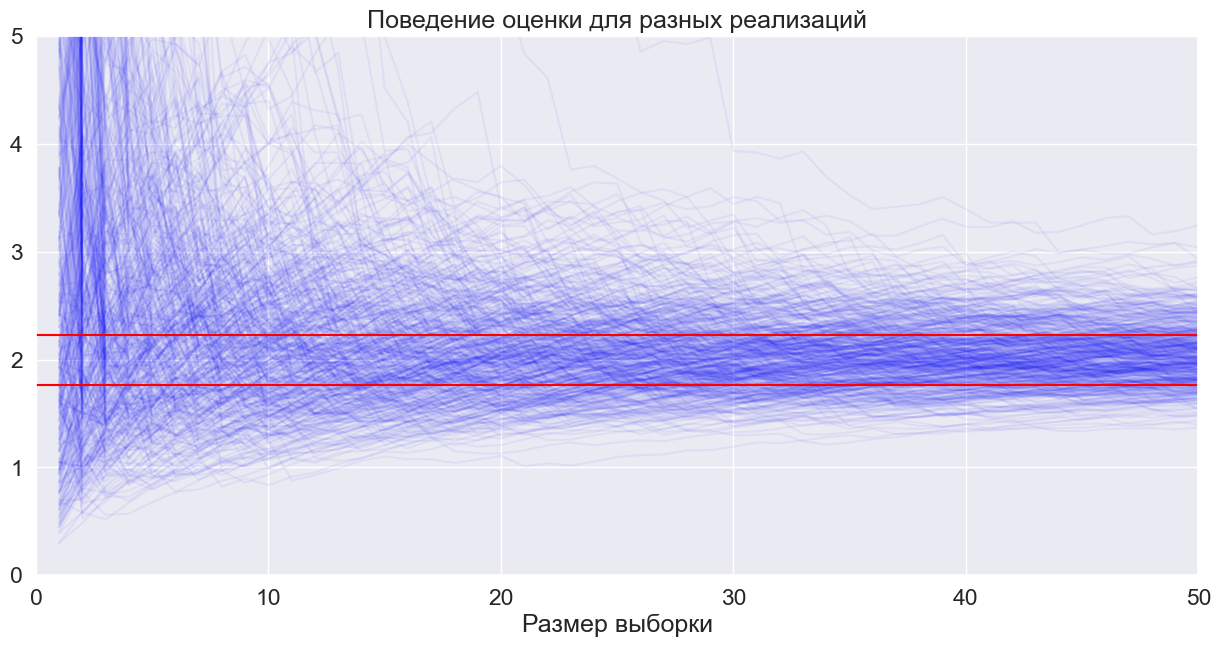

In [151]:
plt.figure(figsize=(15, 7))
for i in range(sample_count):
    plt.plot(np.arange(sample_size) + 1, estimation[i], color='blue', alpha=0.05)

plt.axhline(y = theta + 2 * theta / np.sqrt(sample_size), color = 'r', linestyle = '-')
plt.axhline(y = theta - 2 * theta / np.sqrt(sample_size), color = 'r', linestyle = '-')
plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.ylim((0, 5))
plt.xlim((0, 50));

#### **Ответ:** n = 50 недостаточно велико, чтобы утверждать, что с вероятностью 0.95 значение оценки с данным n будет лежать в данном интервале

## Задача 3.

Пусть $X_1, \ldots, X_n$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$. Визуализируйте свойства состоятельности и асимптотической нормальности для оценки $S^2$ дисперсии $\sigma^2$. 


c:\GitHub projects\PhaseVocoder\.venv\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: Degrees of freedom <= 0 for slice
  # Remove the CWD from sys.path while we load stuff.


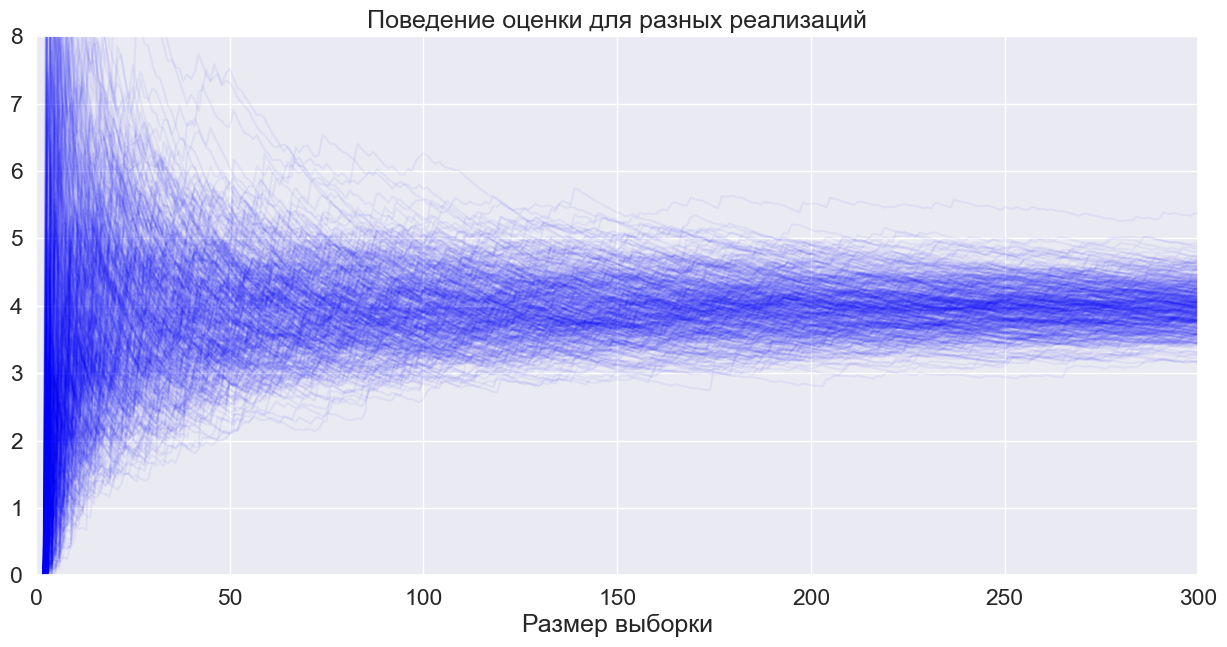

In [157]:
var = 2  # истинное значение параметра
sample_size = 300  # размер выборок
sample_count = 500  # количество выборок
n_range = (np.arange(sample_size) + 1)  # размеры подвыборок

samples = sps.norm(loc=0, scale=var).rvs(size=(sample_count, sample_size))

estimation = np.zeros((sample_count, sample_size))
for i in range(sample_size):
        estimation[:, i] = samples[:, :i].var(axis=1)

plt.figure(figsize=(15, 7))
for i in range(sample_count):
    plt.plot(np.arange(sample_size) + 1, estimation[i], color='blue', alpha=0.05)
plt.title('Поведение оценки для разных реализаций')
plt.xlabel('Размер выборки')
plt.ylim((0, 8))
plt.xlim((0, sample_size));

## Задача 4
Асимпотические доверительные интервалы ничего не могут гарантировать на малых размерах выборки.
В этой задаче вам предстоит иллюстрировать этот факт, посчитав реальный уровень доверия для интервалов. 

**Реальный уровень доверия**  - доля случаев попадания истинного начения параметра в доверительный интервал для его оценки. 

*Пример:* вы проводите 100 экспериментов (создаете 100 выборок), для каждой выборки рассчитываете АДИ для оценки. Истинный параметр попадает в 93 интервала из 100, значит реальный уровень доверия в этом случае будет 0.93


Сгенерируйте набор выборок из нормального распределения $\mathcal{N}(\theta, 1)$, $\theta=0$

In [153]:
theta = 0  # истинное значение параметра
sample_size = 300  
sample_count = 500 
X = sps.norm(loc=theta).rvs(size=(sample_count, sample_size))

Рассмотрим $\hat{\theta} = \overline{X}$.

Напоминание из теории:
$$\hat{\theta} - \frac{z_{\frac{1+\alpha}{2}}\hat{\sigma}}{\sqrt{n}} < \theta < \hat{\theta} + \frac{z_{\frac{1+\alpha}{2}}\hat{\sigma}}{\sqrt{n}}$$

Посичтайте $z$ (используйте функцию `.ppf`)

In [154]:
z = sps.norm.ppf((1 + 0.95) / 2.)

Постройте график зависимости реального уровня доверия от размера выборки. 

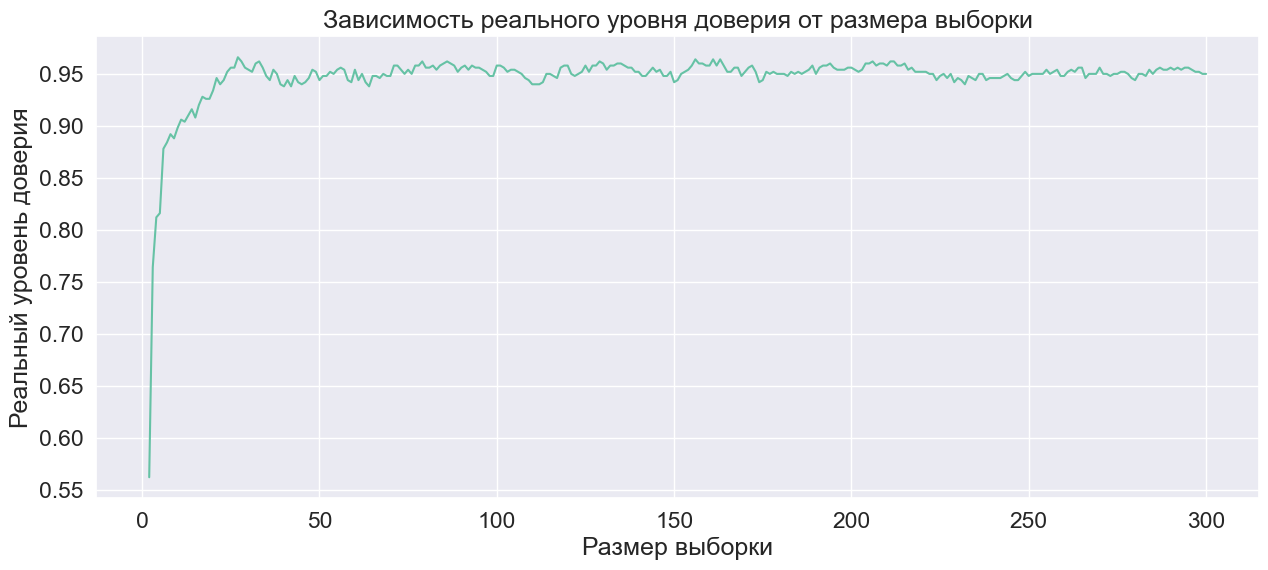

In [155]:
# сложная индексация чтобы не было нулевой дисперсии для одного элемента
n_range = (np.arange(sample_size) + 1)
estimation_mean = (X.cumsum(axis=1) / n_range)[:, 1:]
estimation_var = np.zeros((sample_count, sample_size-1))
for n in n_range[1:]:
        estimation_var[:, n-2] = X[:, :n].var(axis=1)

intervals = z * np.sqrt(estimation_var) / np.sqrt(n_range[1:])
real_confidence = (np.abs(estimation_mean - theta) < intervals).mean(axis=0)

plt.figure(figsize=(15, 6))
plt.title("Зависимость реального уровня доверия от размера выборки")
plt.plot(n_range[1:] , real_confidence)

plt.xlabel('Размер выборки')
plt.ylabel('Реальный уровень доверия');

Сделайте выводы.

**Вывод:** Только начиная с n приблизительно равного 100 мы можем утверждать, что n достаточно велико для справедливости доверительного интервала